In [11]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import helpers
from keras.utils import plot_model

In [2]:
# for Reproductivity
np.random.seed(25)

# Import the data
dataset = pd.read_csv('apple_share_price.csv')
# convert the first column to datetime
dataset['Date'] = dataset.Date.apply(lambda x:datetime.strptime(x,"%d-%b-%y"))
# reverse the time from the oldest to newest
dataset = dataset.reindex(index = dataset.index[::-1])
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1664 entries, 1663 to 0
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1664 non-null   datetime64[ns]
 1   Open    1664 non-null   float64       
 2   High    1664 non-null   float64       
 3   Low     1664 non-null   float64       
 4   Close   1664 non-null   float64       
 5   Volume  1664 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 78.1 KB


In [3]:
# Create three potential indicators
OHLC_avg = dataset[['Open', 'High','Low','Close']].mean(axis = 1)
HLC_avg = dataset[['High', 'Low', 'Close']].mean(axis = 1)
close_val = dataset[['Close']]
series_length = dataset.shape[0]

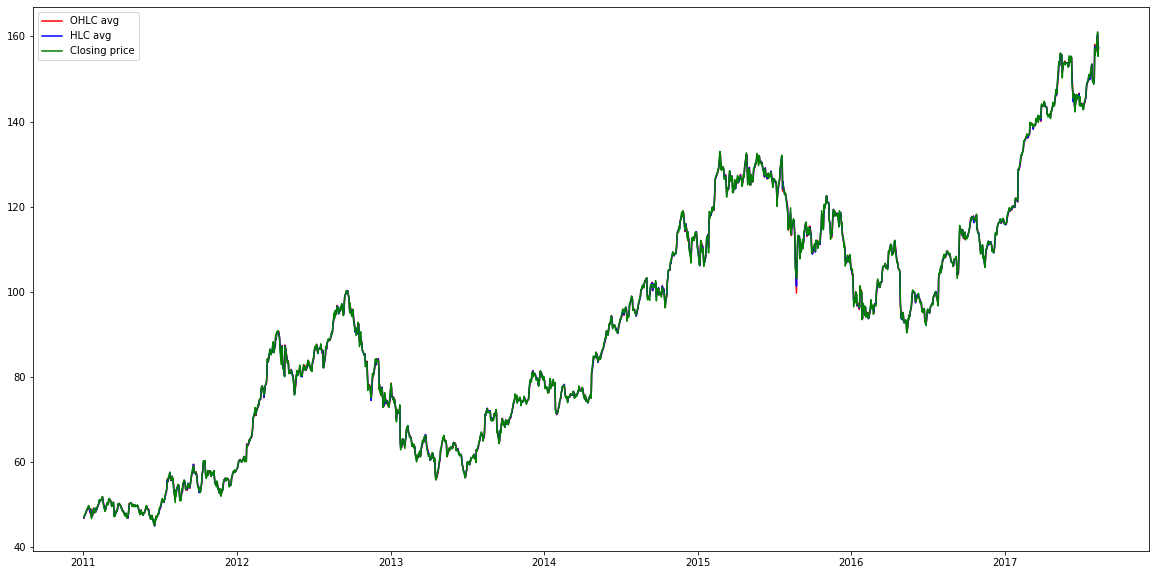

In [4]:
# Plotting all three potential indicators
# observation: the values are very close
plt.figure(figsize=(20,10))
plt.plot(dataset.Date, OHLC_avg, 'r', label = 'OHLC avg')
plt.plot(dataset.Date, HLC_avg, 'b', label = 'HLC avg')
plt.plot(dataset.Date, close_val, 'g', label = 'Closing price')
plt.legend(loc = 'upper left')
plt.show()

In [4]:
step_size = 1
trainX, trainY, testX, testY, scaler = helpers.scale_train_test_split_preprocess(OHLC_avg, 0.75, step_size)
print(trainX.shape)
print(trainY.shape)
print(testX.shape)
print(testY.shape)

(1246, 1, 1)
(1246,)
(414, 1, 1)
(414,)


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 1, 32)             4352      
_________________________________________________________________
lstm_5 (LSTM)                (None, 16)                3136      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
_________________________________________________________________
activation_2 (Activation)    (None, 1)                 0         
Total params: 7,505
Trainable params: 7,505
Non-trainable params: 0
_________________________________________________________________


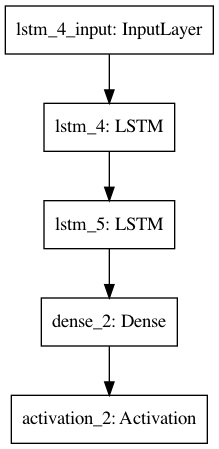

In [12]:
model = helpers.build_LSTM(step_size)
model.summary()
plot_model(model, to_file='img/model.png')

In [7]:
# Model compiling and training
model.compile(loss='mean_squared_error', optimizer='adagrad')
#model.compile(loss='mean_squared_error', optimizer='sgd')
#model.compile(loss='mean_squared_error', optimizer='adam')
history = model.fit(trainX, trainY, epochs=200, batch_size=1, verbose=2)
model.save('model.h5')

Epoch 1/200
1246/1246 - 3s - loss: 0.1116
Epoch 2/200
1246/1246 - 4s - loss: 0.0817
Epoch 3/200
1246/1246 - 4s - loss: 0.0669
Epoch 4/200
1246/1246 - 3s - loss: 0.0578
Epoch 5/200
1246/1246 - 3s - loss: 0.0520
Epoch 6/200
1246/1246 - 3s - loss: 0.0481
Epoch 7/200
1246/1246 - 3s - loss: 0.0455
Epoch 8/200
1246/1246 - 3s - loss: 0.0437
Epoch 9/200
1246/1246 - 3s - loss: 0.0424
Epoch 10/200
1246/1246 - 3s - loss: 0.0414
Epoch 11/200
1246/1246 - 3s - loss: 0.0407
Epoch 12/200
1246/1246 - 3s - loss: 0.0401
Epoch 13/200
1246/1246 - 2s - loss: 0.0395
Epoch 14/200
1246/1246 - 2s - loss: 0.0391
Epoch 15/200
1246/1246 - 2s - loss: 0.0387
Epoch 16/200
1246/1246 - 3s - loss: 0.0383
Epoch 17/200
1246/1246 - 2s - loss: 0.0379
Epoch 18/200
1246/1246 - 2s - loss: 0.0375
Epoch 19/200
1246/1246 - 2s - loss: 0.0372
Epoch 20/200
1246/1246 - 3s - loss: 0.0368
Epoch 21/200
1246/1246 - 3s - loss: 0.0365
Epoch 22/200
1246/1246 - 2s - loss: 0.0362
Epoch 23/200
1246/1246 - 2s - loss: 0.0358
Epoch 24/200
1246/12

1246/1246 - 2s - loss: 1.9457e-04
Epoch 187/200
1246/1246 - 2s - loss: 1.8919e-04
Epoch 188/200
1246/1246 - 2s - loss: 1.8415e-04
Epoch 189/200
1246/1246 - 2s - loss: 1.7944e-04
Epoch 190/200
1246/1246 - 2s - loss: 1.7503e-04
Epoch 191/200
1246/1246 - 2s - loss: 1.7092e-04
Epoch 192/200
1246/1246 - 2s - loss: 1.6707e-04
Epoch 193/200
1246/1246 - 2s - loss: 1.6348e-04
Epoch 194/200
1246/1246 - 2s - loss: 1.6012e-04
Epoch 195/200
1246/1246 - 2s - loss: 1.5698e-04
Epoch 196/200
1246/1246 - 2s - loss: 1.5405e-04
Epoch 197/200
1246/1246 - 2s - loss: 1.5132e-04
Epoch 198/200
1246/1246 - 2s - loss: 1.4877e-04
Epoch 199/200
1246/1246 - 2s - loss: 1.4638e-04
Epoch 200/200
1246/1246 - 2s - loss: 1.4416e-04


In [16]:
history.history

{'loss': [0.1115763932466507,
  0.08165200054645538,
  0.06689564883708954,
  0.05781729519367218,
  0.051969073712825775,
  0.048105478286743164,
  0.045495569705963135,
  0.0436878465116024,
  0.042394883930683136,
  0.041429612785577774,
  0.040675241500139236,
  0.0400625616312027,
  0.03954269737005234,
  0.039081789553165436,
  0.03866158798336983,
  0.03827038034796715,
  0.037898894399404526,
  0.037540141493082047,
  0.03718964755535126,
  0.03684575855731964,
  0.03650614246726036,
  0.03616954758763313,
  0.03583459556102753,
  0.03550119698047638,
  0.0351688377559185,
  0.03483615070581436,
  0.03450305387377739,
  0.03416949883103371,
  0.03383529186248779,
  0.033500172197818756,
  0.033164024353027344,
  0.0328267365694046,
  0.0324883833527565,
  0.03214828670024872,
  0.03180728107690811,
  0.03146441653370857,
  0.031119976192712784,
  0.030773857608437538,
  0.030426420271396637,
  0.030077269300818443,
  0.029726384207606316,
  0.029373962432146072,
  0.02901971898

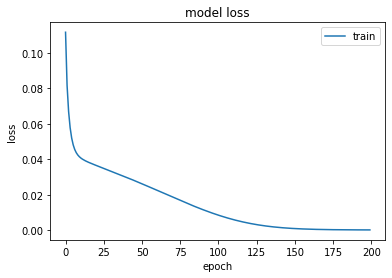

In [18]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper right')
plt.show()

In [8]:
trainPredicted, testPredicted = helpers. make_prediction(model, scaler, trainX, trainY, testX, testY)

Train RMSE: 1.38
Test RMSE: 2.80


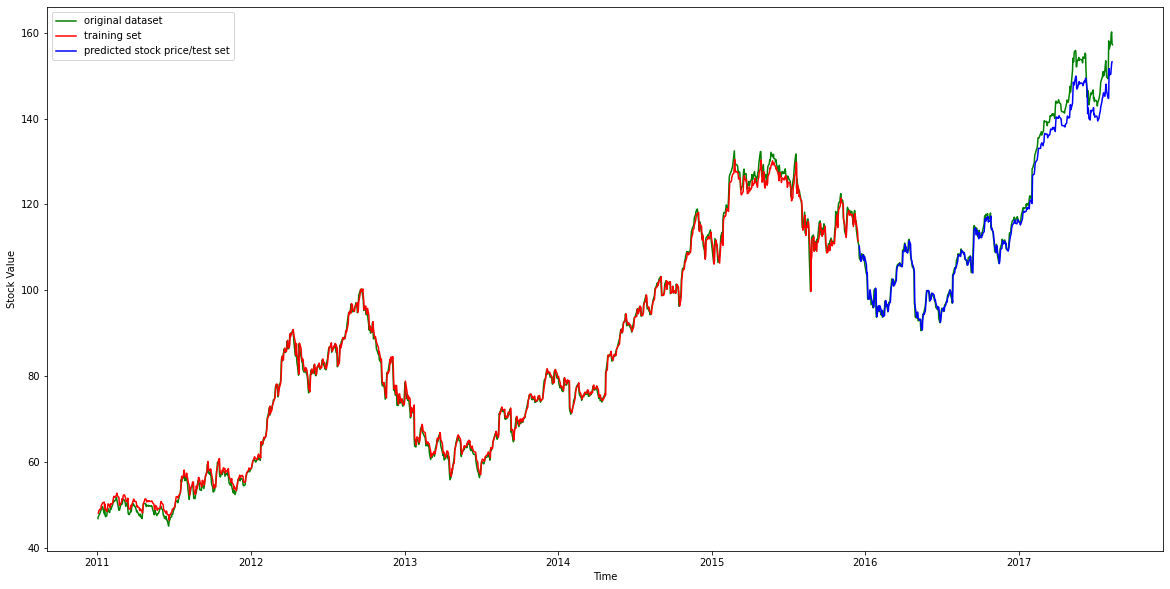

In [9]:
helpers.result_plot(dataset.Date, OHLC_avg, step_size, trainPredicted, testPredicted)

In [200]:
# PREDICT FUTURE VALUES
last_val = testPredict[-1]
last_val_scaled = last_val/last_val
next_val = model.predict(np.reshape(last_val_scaled, (1,1,1)))
print("Last Day Value:", np.asscalar(last_val))
print("Next Day Value:", np.asscalar(last_val*next_val))
# print np.append(last_val, next_val)

Last Day Value: 152.9230499267578
Next Day Value: 143.29136657714844


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  """
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  
